

# Project: Investigating The Movie Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The data Overview: TMDB (The Movie Database)
 This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Questions i'll answer in this project:
 **1-** Dose the movies budget has any kind of impact or relationship with the popularity?
 
 **2-** How it looks the movies release years distribution?
 
 
 **3-** What is the most popular genre?
 
 **4-** What is the most popular movies with highest votes in 2015?

In [1]:
#  import libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.style.use('ggplot')

% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wragling

In [2]:
# import the dataset
tmdb=pd.read_csv('tmdb-movies.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**colmuns have missing values:** imdb_id , cast , homepage , director , tagline , keywords , overview , runtime ,  genres , production_companies

In [4]:
# describe the numaric variables
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# describe the object variables
tmdb.describe(include='O')

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Drama,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


In [6]:
tmdb.shape

(10866, 21)

### Data Cleaning

 **columns i'll not need in my analysis is:**
 
 id, imdb_id, cast, homepage, tagline, keywords, overview, production_companies, release_date

 and it's look like there's alot of zeros in budget_adj and revenue_adj which is not make sence. However, i don't need these columns for my analysis so i'll drop it too.
 
also, i'll try to deal with the column 'genres' because it have multiple values in the same row.
 

In [3]:
# drop columns we don't need
tmdb.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','production_companies','release_date',
           'budget_adj','revenue_adj'], 
        axis=1, inplace=True)

In [4]:
# checking if they have been deleted or not
tmdb.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


In [5]:
# droping the missing values in my dataset
tmdb.dropna(inplace= True)

In [6]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10801 non-null  float64
 1   budget          10801 non-null  int64  
 2   revenue         10801 non-null  int64  
 3   original_title  10801 non-null  object 
 4   director        10801 non-null  object 
 5   runtime         10801 non-null  int64  
 6   genres          10801 non-null  object 
 7   vote_count      10801 non-null  int64  
 8   vote_average    10801 non-null  float64
 9   release_year    10801 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 928.2+ KB


Now we removed all the missing values!

In [11]:
# checking if there's any duplicate columns
tmdb.duplicated().sum()

1

In [7]:
# removing the duplicate columns
tmdb.drop_duplicates(inplace=True)

In [8]:
# removing rows with zeros values
tmdb= tmdb[(tmdb!= 0).all(axis=1)]

In [17]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3853.000000,3.853000e+03,3.853000e+03,3853.000000,3853.000000,3853.000000,3853.000000
mean,1.191825,3.721227e+07,1.077117e+08,109.208928,527.854399,6.168258,2001.259278
std,1.475258,4.221035e+07,1.765554e+08,19.912913,880.031643,0.795001,11.283517
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.462609,1.000000e+07,1.360940e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.797723,2.400000e+07,4.480678e+07,106.000000,204.000000,6.200000,2004.000000
75%,1.368403,5.000000e+07,1.242721e+08,119.000000,580.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


Now we are sure we erased all the zero values.

In [9]:
# delete the multiple values in genres by "|" and keep only the first one
tmdb['genres'] = tmdb['genres'].apply(lambda x: x.split('|')[0])

In [48]:
tmdb.shape

(3853, 10)

In [49]:
tmdb.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2947,7.3,2015


 >now the genres column looks better after deleting the multiple values in row

In [50]:
# making sure we don't have null values before we start exploratory
tmdb.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

 Now it's time to analyze my data and answer my questions after cleaning it.

### Research Question 1 : Dose the movies budget have any kind of impact or relationship with the popularity?

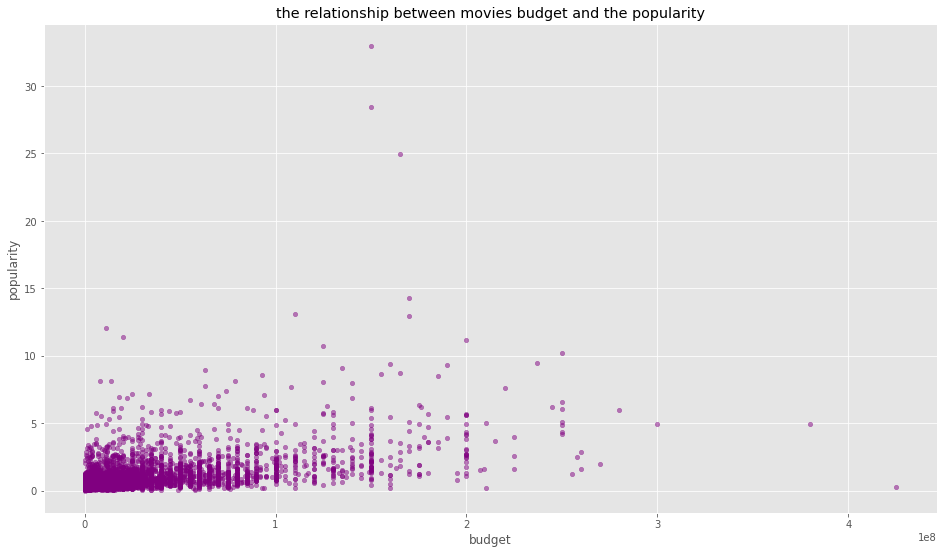

In [15]:
tmdb.plot(x='budget', y='popularity',title="The relationship between movies budget and the popularity",
          kind='scatter', figsize=(16,9), color='purple', alpha=0.5);

> We can see the correlation between the movies budget and their popularity are strong. So, that can answer for us as the movie budget increases, the popularity of the movie tends to also increases.

### Research Question 2 : How it looks the movies release years distribution?

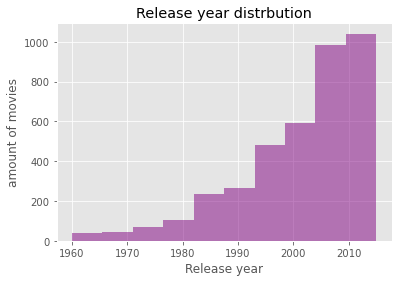

In [14]:
tmdb.release_year.hist(color='purple', alpha=0.5);
plt.title("Release year distrbution")
plt.xlabel("Release year")
plt.ylabel("amount of movies");

the release year look strongly left-skeewd distrbution. which is mean releasing movies is increasing in over the years.

### Research Question 3 : What is the most popular genre?

In [53]:
tmdb.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Thriller',
       'Fantasy', 'History', 'Mystery', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

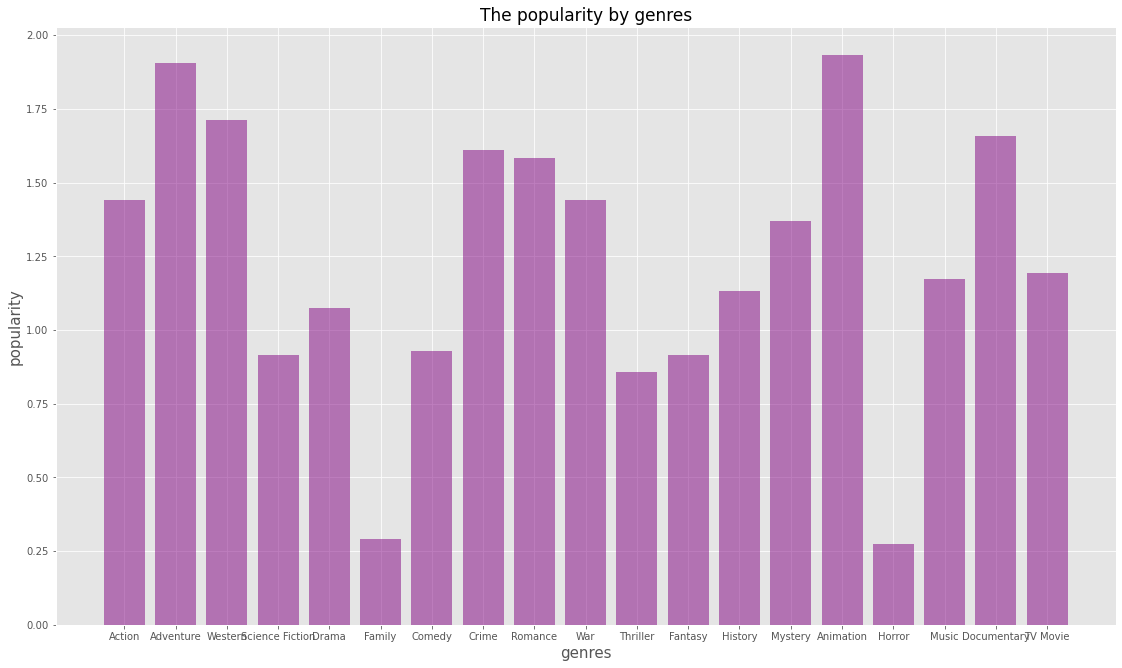

In [16]:
gen_pop =tmdb.groupby('genres').mean()['popularity']
indices = np.arange(len(gen_pop))
fig = plt.figure(figsize=(19,11))
# create labels
labels = ['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Thriller',
       'Fantasy', 'History', 'Mystery', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie']
# Create bars and labels
plt.bar(indices, gen_pop, color='purple', alpha=0.5, tick_label=labels)

# Add title and axis names
plt.title('The popularity by genres', size=17)
plt.xlabel('genres',size=15)
plt.ylabel('popularity',size=15);

# Show graphic
plt.show()

From the chart above, we can see that Adventure and animation is the most watched and popular then become the rest genres.

### Research Question 4 : What is the most popular movies with highest votes in 2015?

In [55]:
x= tmdb.query('release_year > 2014 and vote_average > 7.5')

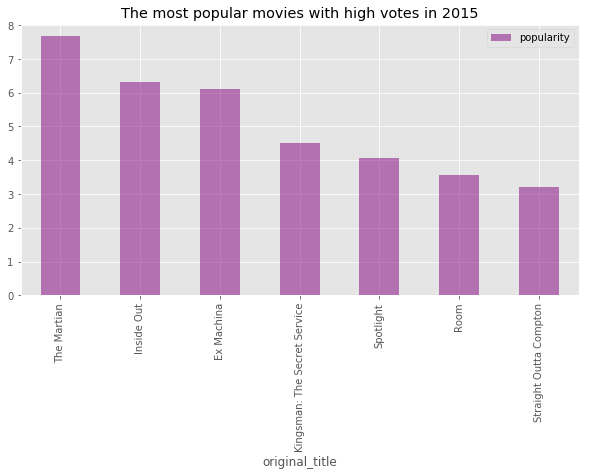

In [84]:
x.plot("original_title", "popularity",kind="bar", title="The most popular movies with high votes in 2015", color="purple",
       alpha=0.5, figsize=(10,5));

the graph shows The martian, inside out and Ex Machina was the three top of movies in 2015 with more than 7.5 vote average.

<a id='conclusions'></a>
## Conclusions

**Results:**
> First result i find budget are strongly correlated with popularity.

> Next We've been thinking How it look the release year distribution? then we found the release year is increasing in the last years in releasing movies and that pretty fun we need more great movies!

> I think most of us when we saw this data asked the same question "What is the the most popular genre?" and here's my findings it show's that animation and adventure are the popular genres and then become the rest.

> Then, we found The Martian, inside out and Ex Machina was the top three popular movies in 2015 with more than 7.5 vote average.

**Limitations:**
> I found alot of missing data in some colmuns and zeros values which is effected my analysis and reduced the rows in my dataset from 10866 row to only 3853 row from cleaning.

> I find it tough to split genres column because it have multiple values in some rows, i tried to split every value after the "|" in row but it did't work with me so i decide to delete all values after the first "|".

In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_The_Movie_Database.ipynb'])

0